In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os.path import join

In [2]:
from utils import videoReader
from matching_video import Match_Video
from matching_frame import Match_Frame
from affine_transfer import Affine_Transform

In [3]:
# loads the image and converts it to rgb
def imread(name, folder="../data/img"):
    img = cv2.imread(join(folder, name))
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plots image
def imshow(img, shape=None):
    if shape != None: plt.figure(figsize=shape)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    
# plotting many images
def plot(imgs, shape=None):
    if shape != None: plt.figure(figsize=shape)
    m = len(imgs)
    for i in range(1, m+1):
        plt.subplot(1, m, i)
        imshow(imgs[i-1])

(99, 175, 3)


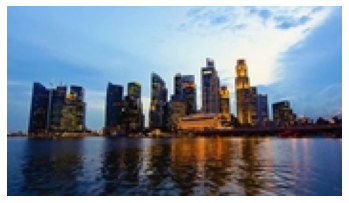

In [4]:
sgp = imread('singapore_25.jpg')
print(sgp.shape)
imshow(sgp)

In [5]:
# press q to quit
cap = videoReader('../data/videos/dubai.avi', True)

In [6]:
# matching video
match_arr = Match_Video().findBestVideo(sgp)
print(match_arr)

[['119.75' '../data/videos/dubai.avi']
 ['129.5' '../data/videos/RHYTHM_OF_THE_CITY___SEATTLE_AT_NIGHT.mp4']
 ['160.625'
  '../data/videos/Miraflores_Timelapse___Lima__Peru__01_2012__1080p_HD.mp4']
 ['161.75' '../data/videos/1170691376.mp4']]


1224 0.03280819003176434
(99, 175, 3)


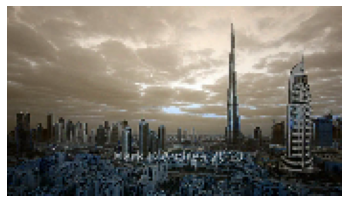

In [7]:
# matching frame of video
img, frame_no, min_dist = Match_Frame().best_distribution_frame(sgp, match_arr[0][1])
print(frame_no, min_dist)
print(img.shape)
imshow(img)

(99, 175, 3)


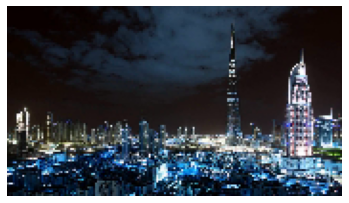

In [8]:
# target frame
cap = videoReader('../data/videos/dubai.avi')
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)
_, Target = cap.read()
Target = cv2.resize(Target, (img.shape[1], img.shape[0]), cv2.INTER_CUBIC)
print(Target.shape)
imshow(Target)

## Output

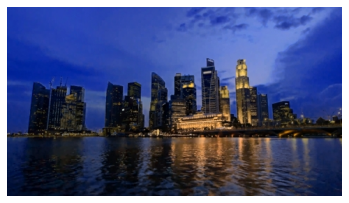

In [9]:
# output
imshow(Affine_Transform().output('singapore_25.jpg'))